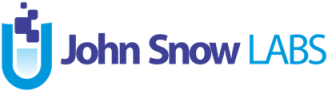

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Degradation_Analysis_Test.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest on John Snow Labs

In [ ]:
!pip install langtest[llms]==2.5.0

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [1]:
#Import Harness from the LangTest library
from langtest import Harness

**Degradation analysis**

Degradation analysis tests are designed to evaluate how the performance of a model degrades when the input data is perturbed. These tests help in understanding the robustness and bias of the model. The process typically involves the following steps:

- **Perturbation:** The original input data is then perturbed. Perturbations can include various modifications such as adding noise, changing word order, introducing typos, or other transformations that simulate real-world variations and errors.

- **Ground Truth vs. Expected Result:** This step involves comparing the original input data (ground truth) with the expected output. This serves as a baseline to understand the model's performance under normal conditions.

- **Ground Truth vs. Actual Result:** The perturbed input data is fed into the model to obtain the actual result. This result is then compared with the ground truth to measure how the perturbations affect the model's performance.

- **Accuracy Drop Measurement:** The difference in performance between the expected result (from the original input) and the actual result (from the perturbed input) is calculated. This difference, or accuracy drop, indicates how robust the model is to the specific perturbations applied.

By conducting degradation analysis tests, you can identify weaknesses in the model's robustness and bias, and take steps to improve its performance under varied and potentially noisy real-world conditions.

### Setup and Configure Harness

In [2]:
from langtest.types import HarnessConfig

test_config = HarnessConfig({
    "tests": {
        "defaults": {
            "min_pass_rate": 0.6,
        },
        "robustness": {
            "uppercase": {
                "min_pass_rate": 0.7,
            },
            "lowercase": {
                "min_pass_rate": 0.7,
            },
            "add_slangs": {
                "min_pass_rate": 0.7,
            },
            "add_ocr_typo": {
                "min_pass_rate": 0.7,
            },
            "titlecase": {
                "min_pass_rate": 0.7,
            }
        },
        "accuracy": {
            "degradation_analysis": {
                "min_score": 0.7,
            }
        }
    }
})

In [3]:
data = {
    "data_source": "BoolQ",
    "split": "dev-tiny",
}

In [4]:
harness = Harness(
    task="question-answering", 
    model={
        "model": "llama3.1:latest", 
        "hub": "ollama",
        "type": "chat",
    },
    config=test_config,
    data=data
)

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 0.6
  },
  "robustness": {
   "uppercase": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   },
   "add_slangs": {
    "min_pass_rate": 0.7
   },
   "add_ocr_typo": {
    "min_pass_rate": 0.7
   },
   "titlecase": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "degradation_analysis": {
    "min_score": 0.7
   }
  }
 }
}


We have specified task as `ner` , hub as `huggingface` and model as `dslim/bert-base-NER`



For tests we used lowercase and uppercase. Other available robustness tests are:

| | | |
|----------------------------|------------------------------|--------------------------------|
| `add_context`            | `add_contraction`        | `add_punctuation`       | `add_typo`              |
| `add_ocr_typo`           | `american_to_british`    | `british_to_american`   | `lowercase`             |
| `strip_punctuation`      | `titlecase`              | `uppercase`             | `number_to_word`        |
| `add_abbreviation`       | `add_speech_to_text_typo`| `add_slangs`            | `dyslexia_word_swap`    |
| `multiple_perturbations` | `adjective_synonym_swap` | `adjective_antonym_swap`|                         |


### Bias

| | | |
|----------------------------|------------------------------|--------------------------------|
| `replace_to_male_pronouns` | `replace_to_female_pronouns`  | `replace_to_neutral_pronouns`  |
| `replace_to_high_income_country` | `replace_to_low_income_country` | `replace_to_upper_middle_income_country` |
| `replace_to_lower_middle_income_country` | `replace_to_white_firstnames` | `replace_to_black_firstnames` |
| `replace_to_hispanic_firstnames` | `replace_to_asian_firstnames` | `replace_to_white_lastnames` |
| `replace_to_sikh_names` | `replace_to_christian_names` | `replace_to_hindu_names` |
| `replace_to_muslim_names` | `replace_to_inter_racial_lastnames` | `replace_to_native_american_lastnames` |
| `replace_to_asian_lastnames` | `replace_to_hispanic_lastnames` | `replace_to_black_lastnames` |
| `replace_to_parsi_names` | `replace_to_jain_names` | `replace_to_buddhist_names` |



### Representation

| | | |
|----------------------------|------------------------------|--------------------------------|
| `min_gender_representation_count` | `min_ethnicity_name_representation_count` | `min_religion_name_representation_count` |
| `min_country_economic_representation_count` | `min_gender_representation_proportion` | `min_ethnicity_name_representation_proportion` |
| `min_religion_name_representation_proportion` | `min_country_economic_representation_proportion` | |



### Accuracy

| | | |
|----------------------------|------------------------------|--------------------------------|
| `min_exact_match_score` | `min_bleu_score` | `min_rouge1_score` |
| `min_rouge2_score` | `min_rougeL_score` | `min_rougeLsum_score` |



### Fairness

| | | |
|----------------------------|------------------------------|--------------------------------|
| `max_gender_rouge1_score` | `max_gender_rouge2_score` | `max_gender_rougeL_score` |
| `max_gender_rougeLsum_score` | `min_gender_rouge1_score` | `min_gender_rouge2_score` |
| `min_gender_rougeL_score` | `min_gender_rougeLsum_score` | |



➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'lowercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

### Generating the test cases.

In [4]:
harness._testcases = None

In [5]:
harness.generate()

Generating testcases...: 100%|██████████| 2/2 [00:00<00:00, 1999.19it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [6]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,All biomass goes through at least some of thes...,does ethanol take more energy make that produces,ALL BIOMASS GOES THROUGH AT LEAST SOME OF THES...,DOES ETHANOL TAKE MORE ENERGY MAKE THAT PRODUCES
1,robustness,uppercase,Property tax or 'house tax' is a local tax on ...,is house tax and property tax are same,PROPERTY TAX OR 'HOUSE TAX' IS A LOCAL TAX ON ...,IS HOUSE TAX AND PROPERTY TAX ARE SAME
2,robustness,uppercase,Phantom pain sensations are described as perce...,is pain experienced in a missing body part or ...,PHANTOM PAIN SENSATIONS ARE DESCRIBED AS PERCE...,IS PAIN EXPERIENCED IN A MISSING BODY PART OR ...
3,robustness,uppercase,Harry Potter and the Escape from Gringotts is ...,is harry potter and the escape from gringotts ...,HARRY POTTER AND THE ESCAPE FROM GRINGOTTS IS ...,IS HARRY POTTER AND THE ESCAPE FROM GRINGOTTS ...
4,robustness,uppercase,Hydroxyzine preparations require a doctor's pr...,is there a difference between hydroxyzine hcl ...,HYDROXYZINE PREPARATIONS REQUIRE A DOCTOR'S PR...,IS THERE A DIFFERENCE BETWEEN HYDROXYZINE HCL ...
...,...,...,...,...,...,...
236,robustness,titlecase,Tipping Point is a British television game sho...,does only the winner get money on tipping point,Tipping Point Is A British Television Game Sho...,Does Only The Winner Get Money On Tipping Point
237,robustness,titlecase,"The turkey vulture (Cathartes aura), also know...",is there such a thing as a turkey vulture,"The Turkey Vulture (Cathartes Aura), Also Know...",Is There Such A Thing As A Turkey Vulture
238,robustness,titlecase,"As of October 2008, a condor (four under par) ...",has anyone hit a hole in one on a par 5,"As Of October 2008, A Condor (Four Under Par) ...",Has Anyone Hit A Hole In One On A Par 5
239,robustness,titlecase,MetLife Stadium is an American sports stadium ...,do the jets and giants share a stadium,Metlife Stadium Is An American Sports Stadium ...,Do The Jets And Giants Share A Stadium


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [7]:
harness.run()

Running testcases... : 100%|██████████| 242/242 [17:28<00:00,  4.33s/it] 


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [8]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,All biomass goes through at least some of thes...,does ethanol take more energy make that produces,ALL BIOMASS GOES THROUGH AT LEAST SOME OF THES...,DOES ETHANOL TAKE MORE ENERGY MAKE THAT PRODUCES,False\n),False,False
1,robustness,uppercase,Property tax or 'house tax' is a local tax on ...,is house tax and property tax are same,PROPERTY TAX OR 'HOUSE TAX' IS A LOCAL TAX ON ...,IS HOUSE TAX AND PROPERTY TAX ARE SAME,False,False,True
2,robustness,uppercase,Phantom pain sensations are described as perce...,is pain experienced in a missing body part or ...,PHANTOM PAIN SENSATIONS ARE DESCRIBED AS PERCE...,IS PAIN EXPERIENCED IN A MISSING BODY PART OR ...,True,True,True
3,robustness,uppercase,Harry Potter and the Escape from Gringotts is ...,is harry potter and the escape from gringotts ...,HARRY POTTER AND THE ESCAPE FROM GRINGOTTS IS ...,IS HARRY POTTER AND THE ESCAPE FROM GRINGOTTS ...,True,True,True
4,robustness,uppercase,Hydroxyzine preparations require a doctor's pr...,is there a difference between hydroxyzine hcl ...,HYDROXYZINE PREPARATIONS REQUIRE A DOCTOR'S PR...,IS THERE A DIFFERENCE BETWEEN HYDROXYZINE HCL ...,True,False,False
...,...,...,...,...,...,...,...,...,...
236,robustness,titlecase,Tipping Point is a British television game sho...,does only the winner get money on tipping point,Tipping Point Is A British Television Game Sho...,Does Only The Winner Get Money On Tipping Point,True,True,True
237,robustness,titlecase,"The turkey vulture (Cathartes aura), also know...",is there such a thing as a turkey vulture,"The Turkey Vulture (Cathartes Aura), Also Know...",Is There Such A Thing As A Turkey Vulture,True,True,True
238,robustness,titlecase,"As of October 2008, a condor (four under par) ...",has anyone hit a hole in one on a par 5,"As Of October 2008, A Condor (Four Under Par) ...",Has Anyone Hit A Hole In One On A Par 5,True,True.,False
239,robustness,titlecase,MetLife Stadium is an American sports stadium ...,do the jets and giants share a stadium,Metlife Stadium Is An American Sports Stadium ...,Do The Jets And Giants Share A Stadium,True,True,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

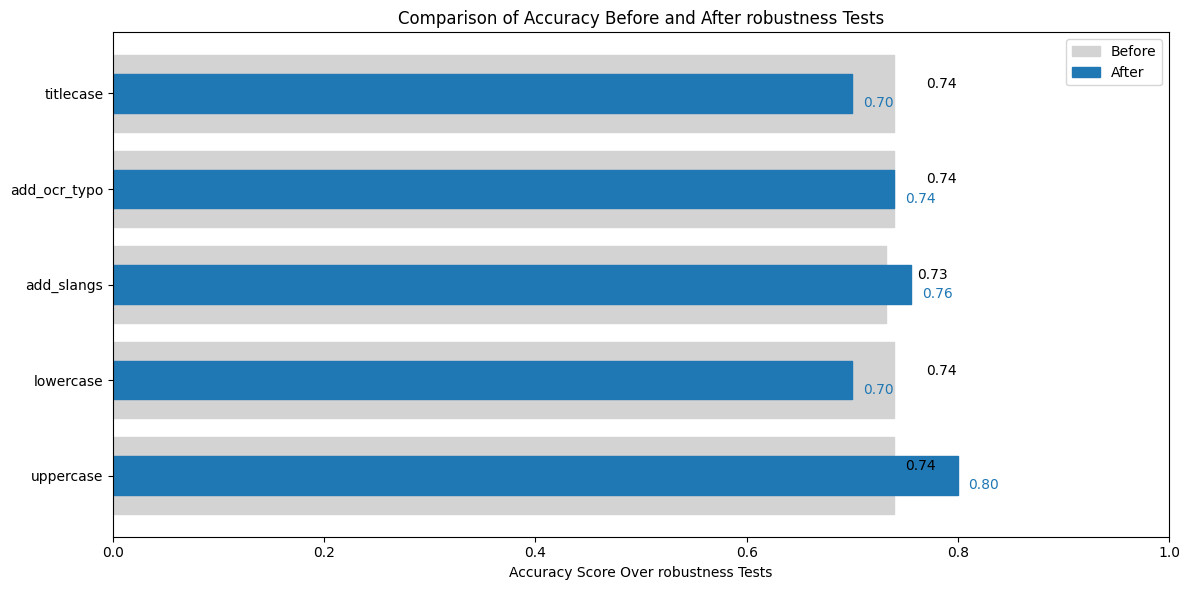

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,13,37,74%,70%,True
1,robustness,lowercase,10,40,80%,70%,True
2,robustness,add_slangs,9,32,78%,70%,True
3,robustness,add_ocr_typo,14,36,72%,70%,True
4,robustness,titlecase,10,40,80%,70%,True


In [9]:
harness.report()